# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [665]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [610]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

In [611]:
from sklearn.linear_model import LinearRegression

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

**Задача оформлена в отдельном pdf-файле**

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [612]:
import torch
from torch import nn
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

Если взять нейросеть, как из задачи 1, попробовать подставить разные коэффициенты, то можно получить различные графики функций.
Некоторые из них выглядят визуально как "симметричная ступенька", поэтому модель может хорошо предсказывать визуально похожие графики.
Такие, как, например, -x^2 или e^(-x^2). Поэтому дальше будем работать с ними.

In [613]:
sample_size = int(1e3)
X = sps.norm.rvs(size=(sample_size, 1))
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train = (-(X_train ** 2)).reshape(X_train.shape[0])
y_test = (-(X_test ** 2)).reshape(X_test.shape[0])

In [614]:
x = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(y_train, dtype=torch.float32)
x_new = x.reshape(-1, 1)
y_new = y.reshape(-1, 1)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [615]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [616]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optim_func = nn.MSELoss()

In [617]:
def show_progress(x, y, y_pred, loss, name):
    y_pred = y_pred.detach()
    loss = loss.item()
    clear_output(wait=True)

    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.1, label = 'реальные данные')
    plt.scatter(x, y_pred, color='orange', linewidth=5, alpha=0.1, label = 'предсказанные данные')
    plt.title(name)
    plt.legend()
    plt.show()

    print(f"MSE = {loss:.3f}")

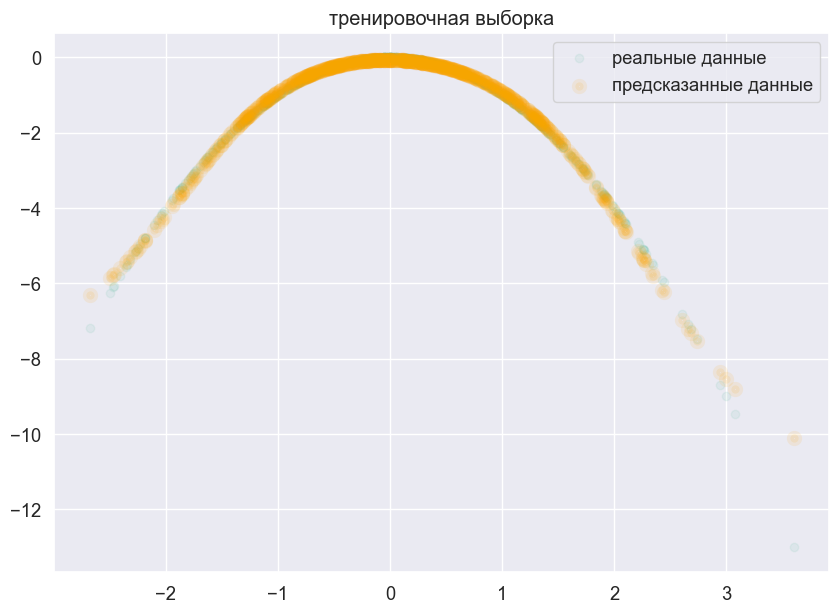

MSE = 0.018


In [618]:
num_iter = 10000

for i in range(num_iter):
    y_pred = model(x_new)
    loss = optim_func(y_pred, y_new)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i + 1) % 1000 == 0:
        show_progress(x, y, y_pred, loss, 'тренировочная выборка')

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

In [619]:
x_new_test = (torch.tensor(X_test, dtype=torch.float32)).reshape(-1, 1)
y_new_test = (torch.tensor(y_test, dtype=torch.float32)).reshape(-1, 1)

y_pred_test = model(x_new_test)
mse = optim_func(y_pred, y_new)
loss_test = optim_func(y_pred, y_new)

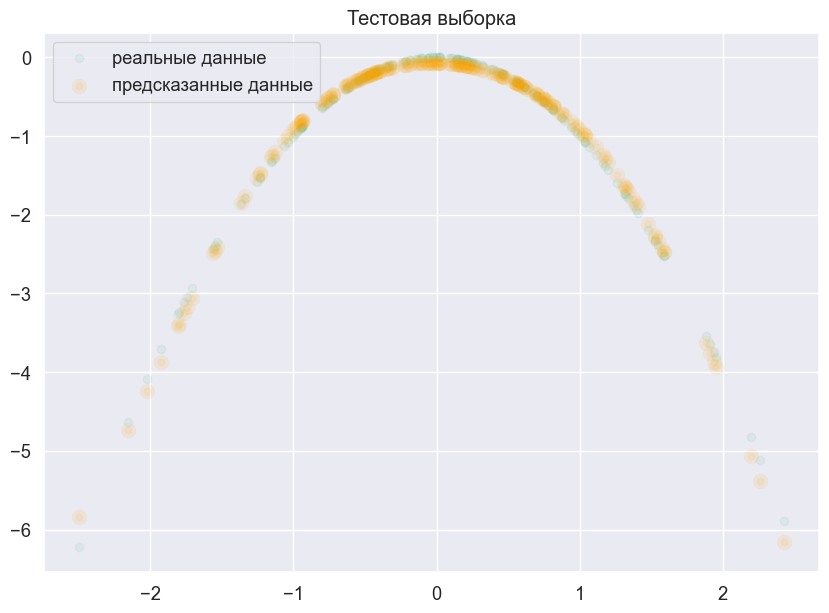

MSE = 0.018


In [620]:
show_progress(x_new_test, y_new_test, y_pred_test, loss_test, 'Тестовая выборка')

**Вывод:**
Данная нейросеть для функции -x^2 и на тренировочной, и на тестовой выборках хорошо оценивает функцию.
Нет переобучения, поскольку и на тестовой, и на тренировочной выборках результат MSE примерно одинаковый.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [621]:
def act_func(x):
    return 1 / (1 + np.exp(-x))

In [622]:
def mse2(y_pred, y):
    squared_diff = (y_pred - y) ** 2
    mse_value = np.mean(squared_diff)
    return mse_value

In [648]:
class Neironet:
    def __init__(self, random_batches = False):
        self.w11 = 0
        self.w12 = 10
        self.b11 = 0
        self.b12 = 10
        self.w21 = 0
        self.w22 = 0
        self.b2 = 10
        self.random_batches = random_batches
        
    def fit(self, big_x, big_y):
        batchsz = 100
        step = 0.1
        step2 = 0.5
        for i in range(100000):
            if self.random_batches:
                indices = np.random.choice(np.arange(len(big_x)), batchsz, replace = True)
                x = big_x[indices]
                y = big_y[indices]
            else:
                x = big_x
                y = big_y
            z1 = self.w11 * x + self.b11
            z2 = self.w12 * x + self.b12
            u1 = act_func(z1)
            u2 = act_func(z2)
            y_pred = self.w21 * u1 +  self.w22 * u2 + self.b2
            
            loss = mse2(y_pred, y)

            mse_ypred = 2 * (y_pred - y) / y.shape[0]

            # считаем коэффициенты для второго слоя

            mse_w21 = np.sum(mse_ypred * u1)
            mse_w22 = np.sum(mse_ypred * u2)
            mse_b2 = np.sum(mse_ypred)
            mse_u1_column = mse_ypred * self.w21
            mse_u2_column = mse_ypred * self.w22
            mse_u1 = np.sum(mse_u1_column)
            mse_u2 = np.sum(mse_u2_column)


            # теперь для первого слоя

            u1_w11 = u1 * (1 - u1) * x
            u2_w12 = u2 * (1 - u2) * x
            u1_b11 = u1 * (1 - u1) 
            u2_b12 = u2 * (1 - u2)

            mse_w11 = np.sum(mse_u1_column * u1_w11)
            mse_w12 = np.sum(mse_u2_column * u2_w12)
            mse_b11 = np.sum(mse_u1_column * u1_b11)
            mse_b12 = np.sum(mse_u2_column * u2_b12)

            # вычисляем новые значения констант

            self.w11 -= mse_w11 * step
            self.w12 -= mse_w12 * step
            self.w22 -= mse_w22 * step
            self.w21 -= mse_w21 * step
            self.b11 -= mse_b11 * step2
            self.b12 -= mse_b12 * step2
            self.b2 -= mse_b2 * step2
        
        return self
    
    
    def predict(self, x):
        
        u1 = act_func(self.w11 * x + self.b11)
        u2 = act_func(self.w12 * x + self.b12)
        predictions = self.w21 * u1 +  self.w22 * u2 + self.b2
        
        return predictions

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [649]:
model2 = Neironet()

In [650]:
X_train2 = np.array(X_train)
y_train2 = np.array(y_train)
y_train2 = np.transpose([y_train2])
X_test2 = np.array(X_test)
y_test2 = np.array(y_test)
y_test2 = np.transpose([y_test2])
model2.fit(X_train2, y_train2)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [651]:
y_predict2 = model2.predict(X_test2)
mse_2 = mse2(y_predict2, y_test2)
print(mse_2)

0.06990663179202064


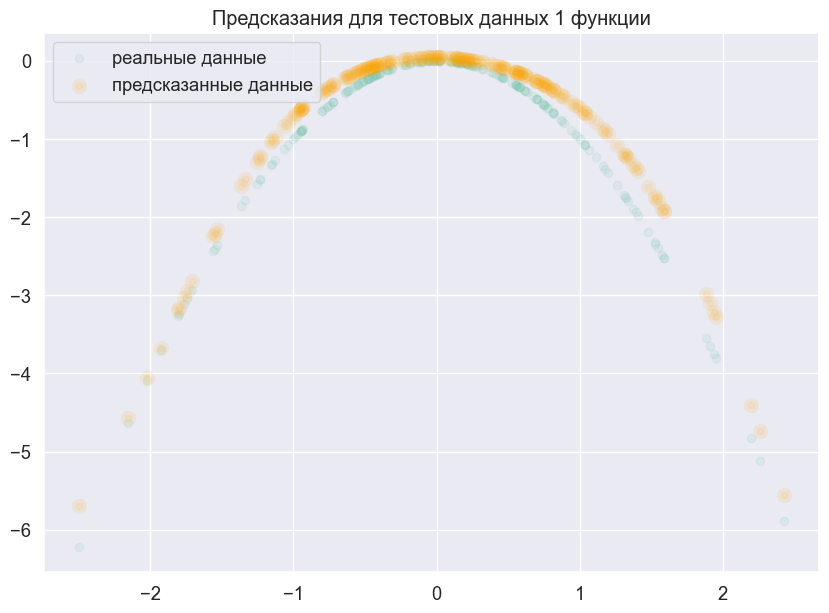

In [652]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test2, y_test2, alpha=0.1, label='реальные данные')
plt.scatter(X_test2, y_predict2, color='orange', linewidth=5, alpha=0.1, label='предсказанные данные')
plt.title('Предсказания для тестовых данных 1 функции')
plt.legend()
plt.show()

In [653]:
model2_batches = Neironet(True)
model2_batches.fit(X_train2, y_train2)
y_predict2_batches = model2.predict(X_test2)
mse_2_batches = mse2(y_predict2_batches, y_test2)
print(mse_2_batches)

0.06990663179202064


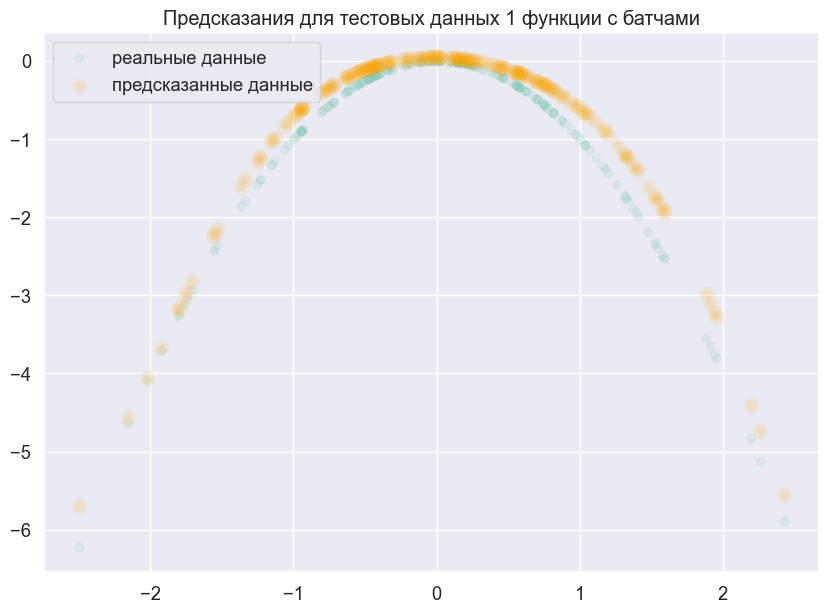

In [654]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test2, y_test2, alpha=0.1, label='реальные данные')
plt.scatter(X_test2, y_predict2_batches, color='orange', linewidth=5, alpha=0.1, label='предсказанные данные')
plt.title('Предсказания для тестовых данных 1 функции c батчами')
plt.legend()
plt.show()

**Используем линейную регрессию**

In [655]:
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(X_train2, y_train2)
y_predict2_linear = model_linear.predict(X_test2)
mse_2_linear = mse2(y_predict2_linear, y_test2)
print(mse_2_linear)

1.4083713668871656


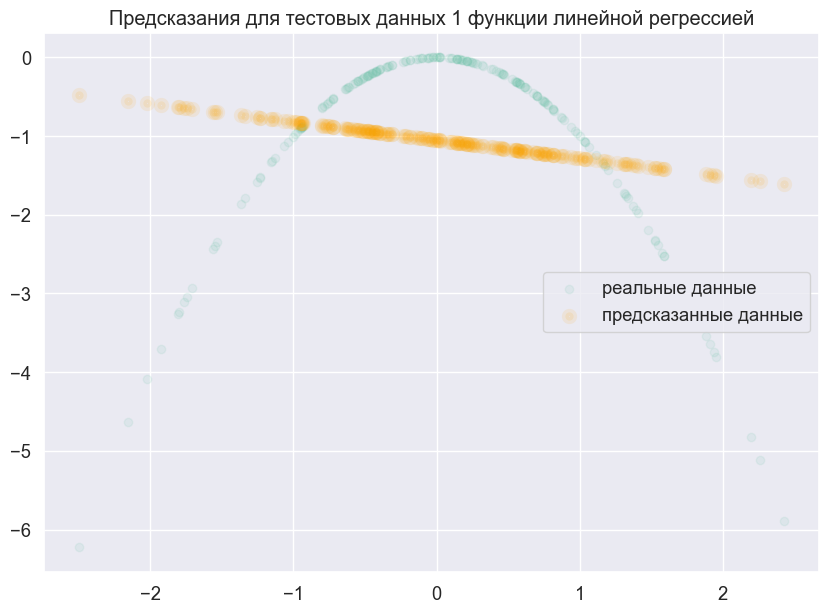

In [656]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test2, y_test2, alpha=0.1, label='реальные данные')
plt.scatter(X_test2, y_predict2_linear, color='orange', linewidth=5, alpha=0.1, label='предсказанные данные')
plt.title('Предсказания для тестовых данных 1 функции линейной регрессией')
plt.legend()
plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

In [657]:
sample_size = int(1e3)
X3 = sps.norm.rvs(size=(sample_size, 1))
X_train3, X_test3 = train_test_split(X, test_size=0.2, random_state=42)
y_train3 = (np.exp(-(X_train3 ** 2))).reshape(X_train3.shape[0])
y_test3 = (np.exp(-(X_test3 ** 2))).reshape(X_test3.shape[0])

In [658]:
X_train3 = np.array(X_train3)
y_train3 = np.array(y_train3)
y_train3 = np.transpose([y_train3])
X_test3 = np.array(X_test3)
y_test3 = np.array(y_test3)
y_test3 = np.transpose([y_test3])

In [659]:
model3 = Neironet()
model3.fit(X_train3, y_train3)
y_predict3 = model3.predict(X_test3)
mse_3 = mse2(y_predict3, y_test3)
print(mse_3)

0.0005523369245241161


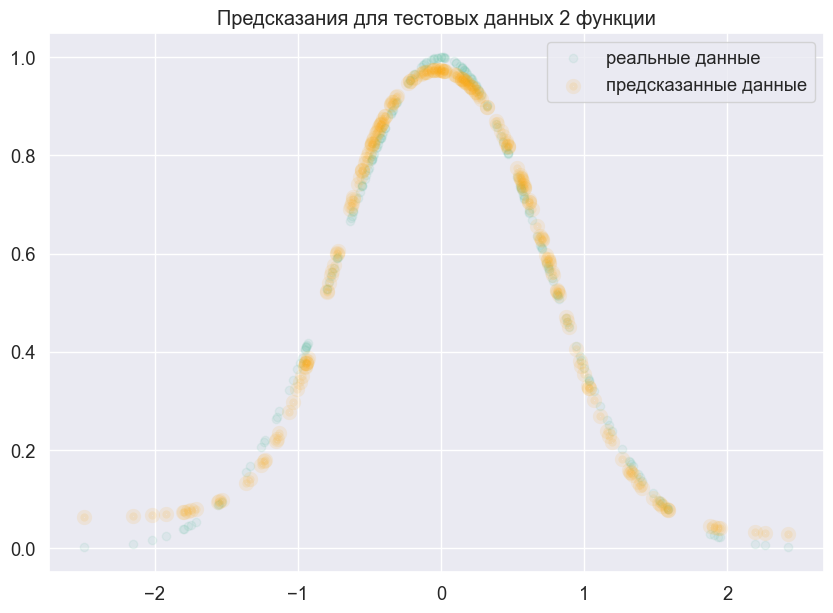

In [660]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test3, y_test3, alpha=0.1, label='реальные данные')
plt.scatter(X_test3, y_predict3, color='orange', linewidth=5, alpha=0.1, label='предсказанные данные')
plt.title('Предсказания для тестовых данных 2 функции')
plt.legend()
plt.show()

In [661]:
model3_batches = Neironet(True)
model3_batches.fit(X_train3, y_train3)
y_predict3_batches = model3.predict(X_test3)
mse_3_batches = mse2(y_predict3_batches, y_test3)
print(mse_3_batches)

0.0005523369245241161


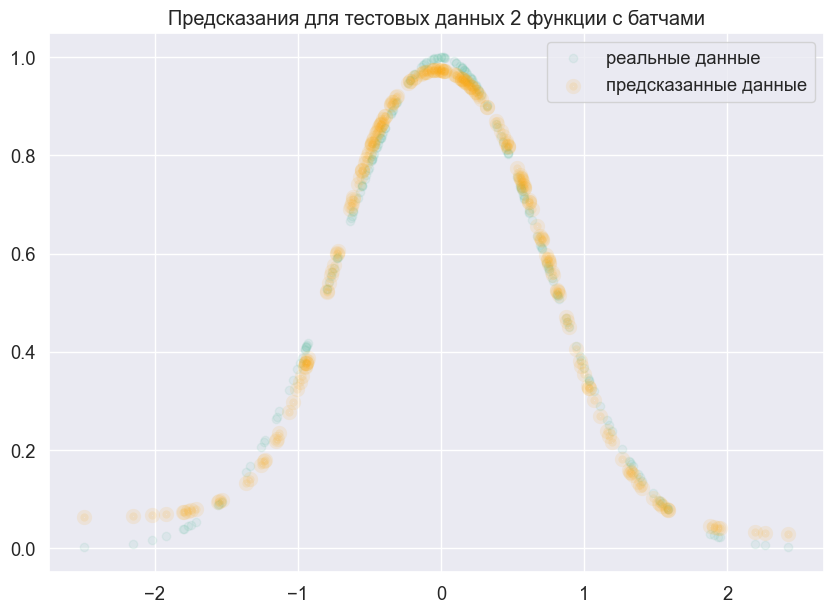

In [662]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test3, y_test3, alpha=0.1, label='реальные данные')
plt.scatter(X_test3, y_predict3_batches, color='orange', linewidth=5, alpha=0.1, label='предсказанные данные')
plt.title('Предсказания для тестовых данных 2 функции с батчами')
plt.legend()
plt.show()

In [663]:
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(X_train3, y_train3)
y_predict3_linear = model_linear.predict(X_test3)
mse_3_linear = mse2(y_predict3_linear, y_test3)
print(mse_3_linear)

0.10430041553066402


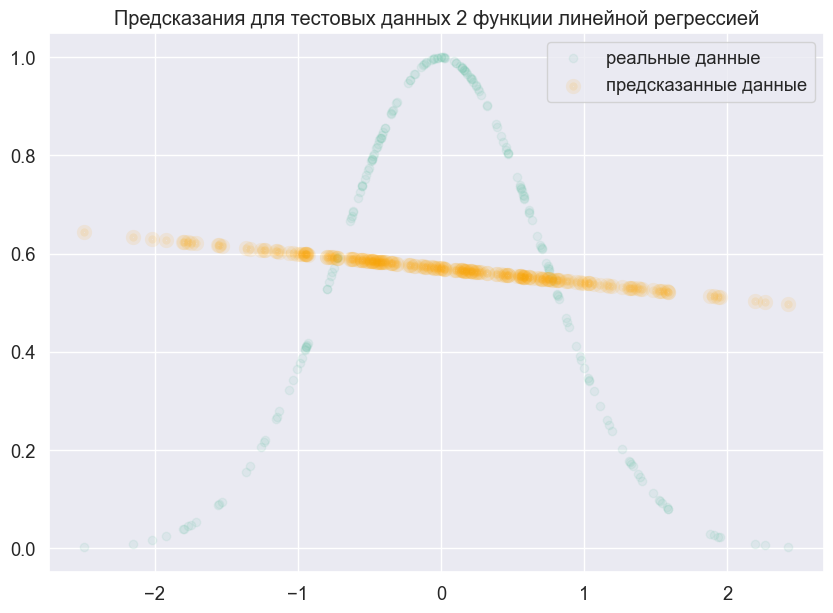

In [664]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test3, y_test3, alpha=0.1, label='реальные данные')
plt.scatter(X_test3, y_predict3_linear, color='orange', linewidth=5, alpha=0.1, label='предсказанные данные')
plt.title('Предсказания для тестовых данных 2 функции линейной регрессией')
plt.legend()
plt.show()

**Вывод:**
Обе фукции визуально приближаются хорошо нашей моделью, и плохо линейной регрессией. Значения MSE на порядок лучше у нашей модели.

Наша модель при обучении по всем данным и по данным с батчами размером 100 дает примерно одинаковые результаты, при этом с батчами работает быстрее.

Относительно встроенной модели результаты предсказания чуть хуже - это может быть связано с ограничениями на выбор step, с рандомным подбором начальных коэффициентов на первой итерации.